In [2]:
import json
with open('bert_pipeline.json', 'r') as f:
    data = json.load(f)

at 0, 0: {'micro_auroc': 0.8635259866714478, 'mcc': 0.40078513913890035}
at 0, 1: {'micro_auroc': 0.861729085445404, 'mcc': 0.4027864072674967}
at 0, 2: {'micro_auroc': 0.8624372482299805, 'mcc': 0.39570089690652116}
at 1, 0: {'micro_auroc': 0.8914542198181152, 'mcc': 0.49436188014854693}
at 1, 1: {'micro_auroc': 0.8874056339263916, 'mcc': 0.4687945193809385}
at 1, 2: {'micro_auroc': 0.9036444425582886, 'mcc': 0.5257709186539516}
at 2, 0: {'micro_auroc': 0.5384442806243896, 'mcc': 0.07555394495081404}
at 2, 1: {'micro_auroc': 0.8915934562683105, 'mcc': 0.45442011530796095}
at 2, 2: {'micro_auroc': 0.7065767049789429, 'mcc': 0.2152550249832259}
at 3, 0: {'micro_auroc': 0.5118563771247864, 'mcc': 0.0}
at 3, 1: {'micro_auroc': 0.512786865234375, 'mcc': 0.0}
at 3, 2: {'micro_auroc': 0.4751223921775818, 'mcc': 0.008496862043083352}
at 4, 0: {'micro_auroc': 0.48281580209732056, 'mcc': 0.0}
at 4, 1: {'micro_auroc': 0.5303713083267212, 'mcc': 0.0}
at 4, 2: {'micro_auroc': 0.5020306706428528, '

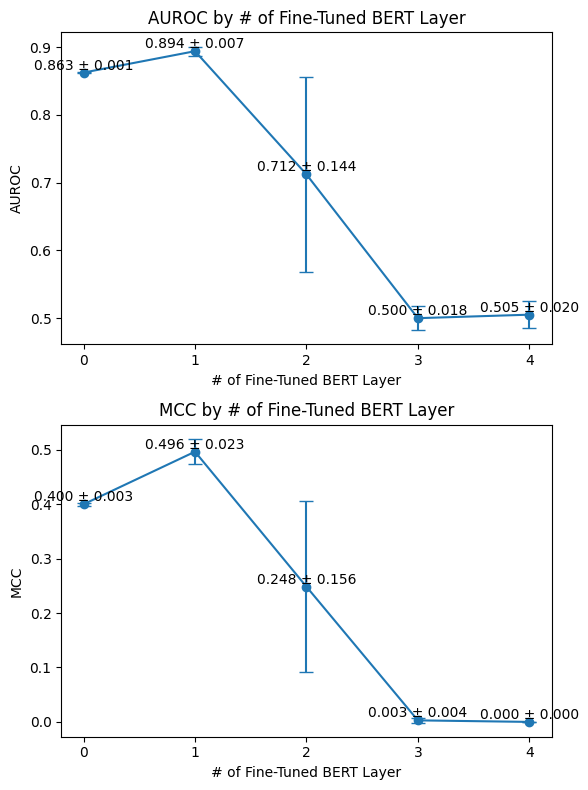

In [4]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

layers = np.unique([d['train_layer'] for d in data])

avg_metrics = {'micro_auroc': [], 'mcc': []}
std_metrics = {'micro_auroc': [], 'mcc': []}

for layer in range(5):
    layer_data = [d for d in data if d['train_layer'] == layer]
    trials = np.unique([d['trial'] for d in layer_data])
    
    metrics = {'micro_auroc': [], 'mcc': []}
    for trial in range(3):
        trial_data = [d for d in layer_data if d['trial'] == trial]
        last_epoch_metric = trial_data[-1]['data']
        print(f'at {layer}, {trial}: {last_epoch_metric}')
        
        metrics['micro_auroc'].append(last_epoch_metric['micro_auroc'])
        metrics['mcc'].append(last_epoch_metric['mcc'])
    
    avg_metrics['micro_auroc'].append(np.mean(metrics['micro_auroc']))
    avg_metrics['mcc'].append(np.mean(metrics['mcc']))
    std_metrics['micro_auroc'].append(np.std(metrics['micro_auroc']))
    std_metrics['mcc'].append(np.std(metrics['mcc']))

# Plotting
fig, axs = plt.subplots(2, figsize=(6,8))

# micro_auroc plot
axs[0].errorbar(layers, avg_metrics['micro_auroc'], yerr=std_metrics['micro_auroc'], fmt='-o', capsize=5)
axs[0].set_title('AUROC by # of Fine-Tuned BERT Layer')
axs[0].set_xlabel('# of Fine-Tuned BERT Layer')
axs[0].set_ylabel('AUROC')

# Add labels to micro_auroc data points
for layer, avg, std in zip(layers, avg_metrics['micro_auroc'], std_metrics['micro_auroc']):
    axs[0].text(layer, avg, '%.3f ± %.3f' % (avg, std), ha='center', va='bottom')
axs[0].set_xticks(layers)
# mcc plot
axs[1].errorbar(layers, avg_metrics['mcc'], yerr=std_metrics['mcc'], fmt='-o', capsize=5)
axs[1].set_title('MCC by # of Fine-Tuned BERT Layer')
axs[1].set_xlabel('# of Fine-Tuned BERT Layer')
axs[1].set_ylabel('MCC')

# Add labels to mcc data points
for layer, avg, std in zip(layers, avg_metrics['mcc'], std_metrics['mcc']):
    axs[1].text(layer, avg, '%.3f ± %.3f' % (avg, std), ha='center', va='bottom')
axs[1].set_xticks(layers)

plt.tight_layout()
plt.show()